<a href="https://colab.research.google.com/github/xxHARSHxx/Stock-Price-prediction/blob/main/TeslaStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
stock = pd.read_csv("archive.zip")

In [ ]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [ ]:
stock.shape

(2956, 7)

In [ ]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [ ]:
stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

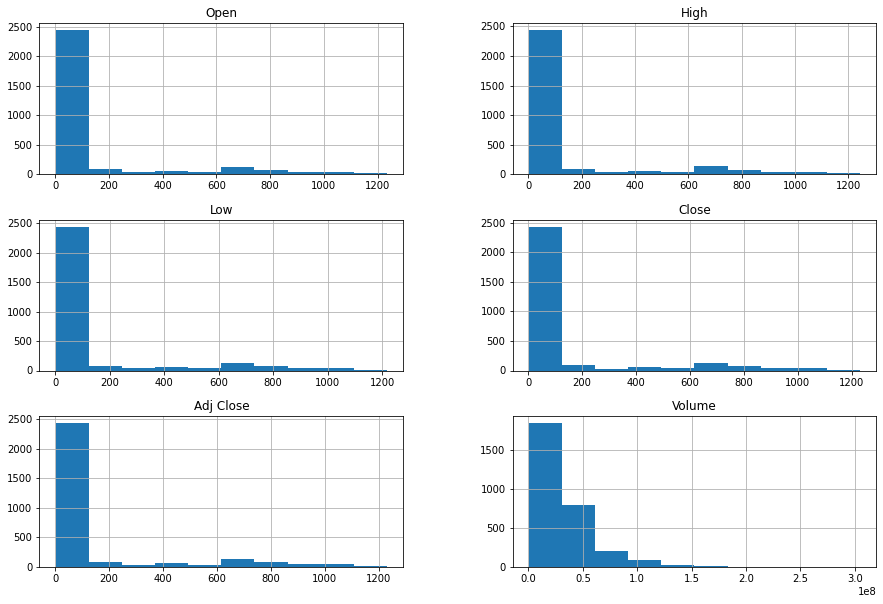

In [ ]:
stock.hist(figsize=(15, 10))

array([[<Axes: xlabel='Open', ylabel='Open'>,
        <Axes: xlabel='High', ylabel='Open'>,
        <Axes: xlabel='Low', ylabel='Open'>,
        <Axes: xlabel='Close', ylabel='Open'>,
        <Axes: xlabel='Adj Close', ylabel='Open'>,
        <Axes: xlabel='Volume', ylabel='Open'>],
       [<Axes: xlabel='Open', ylabel='High'>,
        <Axes: xlabel='High', ylabel='High'>,
        <Axes: xlabel='Low', ylabel='High'>,
        <Axes: xlabel='Close', ylabel='High'>,
        <Axes: xlabel='Adj Close', ylabel='High'>,
        <Axes: xlabel='Volume', ylabel='High'>],
       [<Axes: xlabel='Open', ylabel='Low'>,
        <Axes: xlabel='High', ylabel='Low'>,
        <Axes: xlabel='Low', ylabel='Low'>,
        <Axes: xlabel='Close', ylabel='Low'>,
        <Axes: xlabel='Adj Close', ylabel='Low'>,
        <Axes: xlabel='Volume', ylabel='Low'>],
       [<Axes: xlabel='Open', ylabel='Close'>,
        <Axes: xlabel='High', ylabel='Close'>,
        <Axes: xlabel='Low', ylabel='Close'>,
        <Axes:

<Figure size 504x360 with 0 Axes>

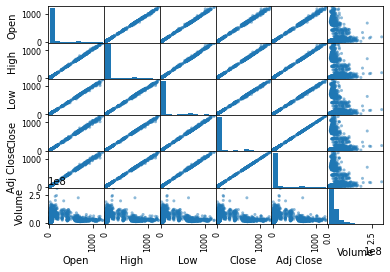

In [ ]:
plt.figure(figsize=(7,5))
pd.plotting.scatter_matrix(stock)

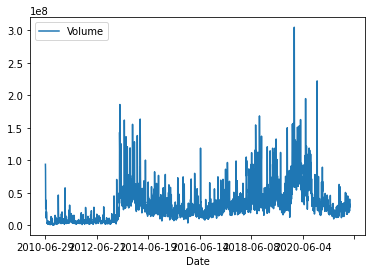

In [ ]:
lines = stock.plot.line(x='Date', y='Volume')

<Axes: >

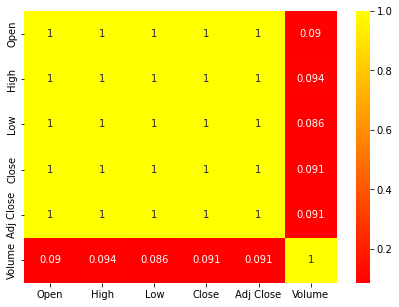

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(stock.corr(),cmap='autumn',annot=True)

<ipython-input-51-f99f92513331>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


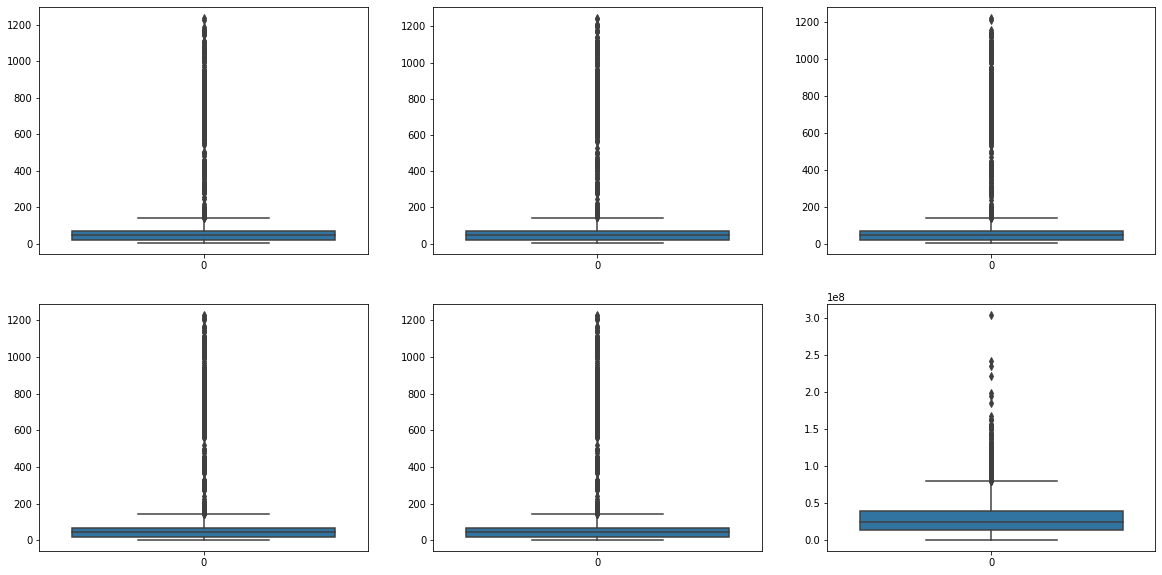

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(stock[col])
plt.show()

In [ ]:
#splitting Date into day,month,year
splitted = stock['Date'].str.split('-', expand=True)

stock['day'] = splitted[2].astype('int')
stock['month'] = splitted[1].astype('int')
stock['year'] = splitted[0].astype('int')

stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,29,6,2010
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,30,6,2010
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,1,7,2010
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,2,7,2010
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,6,7,2010


In [ ]:
#adding a variable named 'is_quarter_end' which will show price changes

stock['is_quarter_end'] = np.where(stock['month']%3==0,1,0)
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,29,6,2010,1
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,30,6,2010,1
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,1,7,2010,0
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,2,7,2010,0
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,6,7,2010,0


<ipython-input-54-a2ed7ca8f483>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


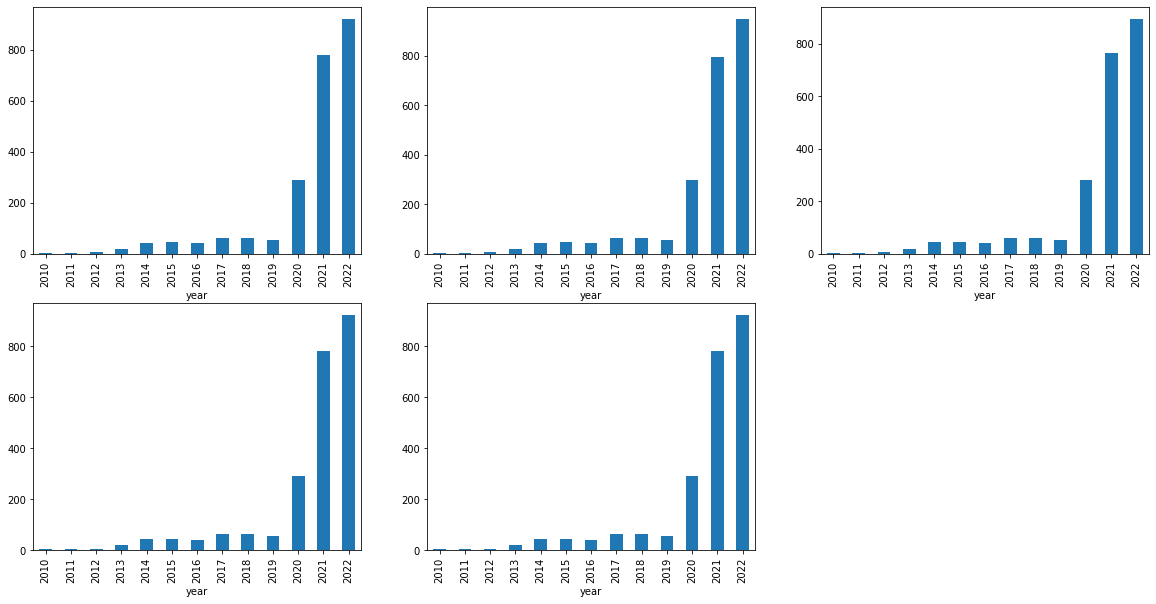

In [ ]:

data_grouped = stock.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close', 'Adj Close']):
  plt.subplot(2,3,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [ ]:

stock.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,136.474690,139.523037,133.361644,136.531872,136.531872,3.194378e+07,15.701987,6.124300,2015.855833
1,143.073168,146.216652,139.506757,143.171146,143.171146,3.007048e+07,15.736153,7.489426,2015.852971


In [ ]:
#Training and testing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
X = stock[["Open", "High", "Low", "Close", "Volume", "is_quarter_end"]]
y = stock["Adj Close"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
#Linear regression
lr_model=LinearRegression()

lr_model.fit(X_train,y_train)

lr_predict = lr_model.predict(X_test)

print(lr_predict)

[  71.463997    6.876       5.92        5.622      50.638      45.27
   11.158      50.293999  113.912003   40.551998    5.606       4.824
   43.939999    3.58       85.528      62.327999   33.756001   51.402
  870.109985   60.754002    5.746      46.285999  835.429993    4.996
    6.276       4.642      65.625999   68.400002   50.310001    3.988
    6.626      35.422001   27.6        41.490002   47.698002   46.194
   45.816002 1096.380005   43.029999  380.359985    7.094      67.463997
   55.001999    5.17        6.45      299.411987    5.522      71.066002
   46.464001   39.646      40.976002    6.93       41.571999   39.321999
   60.501999  809.869995    6.52      441.76001    48.386002   59.492001
  438.089996   63.532001   63.562      46.220001   35.799999    6.298
   46.796001   29.598      55.723999  838.299988   52.431999   46.321999
  447.75       45.414001  756.98999    56.945999 1137.060059   42.256001
   86.188004   49.695999   49.984001    5.298     699.099976  630.849976


In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, lr_predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, lr_predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, lr_predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, lr_predict), 4))
print(f'Train Score : {lr_model.score(X_train, y_train) * 100:.2f}% and Test Score : {lr_model.score(X_test, y_test) * 100:.2f}% using Linear Regression.')
errors = abs(lr_predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Linear Regression.
Accuracy: 100.0 %.


In [ ]:
#SVM 
regr = svm.SVR(kernel='linear')
regr.fit(X_train, y_train)
svm_predict = regr.predict(X_test)
print(svm_predict)

[  72.99799804    6.87352398    5.83278333    5.58002167   50.41350975
   44.83525831   11.37063606   50.41236075  114.81161496   40.41783989
    5.54863968    4.92582861   44.04134376    3.65955953   81.28251019
   62.73251879   33.99487997   51.91013804  862.85437089   60.75417904
    5.74444336   46.3152959   826.57463217    4.93275848    6.3288788
    4.71722934   63.06643736   67.43178439   50.03278699    4.00463825
    6.61607388   35.94955568   27.28512741   41.46046947   47.74920137
   46.52975702   45.72273904 1096.44261395   42.77309383  391.67745266
    7.05951874   67.11128139   56.07605737    5.20573163    6.51757272
  318.85811946    5.61021204   70.99535516   46.95189841   39.77651672
   40.65035523    6.93326013   41.70851396   39.68656807   60.87812029
  804.94688221    6.54082853  443.54668603   48.07502563   59.18302843
  433.00092941   63.89370344   62.87512959   46.58543833   35.03954202
    6.30340656   46.84930924   30.33589855   55.5747713   837.48255602
   52.1

In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, svm_predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, svm_predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, svm_predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, svm_predict), 4))
print(f'Train Score : {regr.score(X_train, y_train) * 100:.2f}% and Test Score : {regr.score(X_test, y_test) * 100:.2f}% using Support Vector Machine.')
errors = abs(svm_predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 1.5539
Mean Squared Error: 16.7054
Root Mean Squared Error: 4.0872
(R^2) Score: 0.9998
Train Score : 99.97% and Test Score : 99.98% using Support Vector Machine.
Accuracy: 99.05 %.


In [ ]:
from sklearn import tree

In [ ]:
#DecisionTree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
dt = clf.predict(X_test)
print(dt)

[  71.594002    6.88        5.914       5.628      50.599998   45.276001
   10.798      50.284     116.197998   40.546001    5.61        4.814
   43.948002    3.664      83.666      62.362      33.787998   51.400002
  872.789978   60.740002    5.742      46.310001  839.809998    4.986
    6.258       4.636      65.68       68.398003   50.313999    3.974
    6.618      35.442001   27.472      41.5        47.726002   46.194
   45.801998 1093.939941   43.042     377.417999    7.072      67.468002
   55.248001    5.166       6.45      302.614014    5.528      71.080002
   46.5        39.66       40.944       6.922      41.57       39.330002
   60.512001  811.190002    6.516     442.149994   48.386002   59.486
  434.         63.458      63.509998   46.256001   35.740002    6.298
   46.801998   29.596001   55.490002  839.809998   52.41       46.358002
  447.369995   45.424     753.640015   56.751999 1136.98999    42.268002
   86.075996   49.695999   50.006001    5.288     699.599976  633.25


In [ ]:

print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, dt), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, dt), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, dt)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, dt), 4))
print(f'Train Score : {clf.score(X_train, y_train) * 100:.2f}% and Test Score : {clf.score(X_test, y_test) * 100:.2f}% using Decision Tree.')
errors = abs(dt - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.704
Mean Squared Error: 11.0677
Root Mean Squared Error: 3.3268
(R^2) Score: 0.9998
Train Score : 100.00% and Test Score : 99.98% using Decision Tree.
Accuracy: 99.71 %.


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#KNN
knn_regressor = KNeighborsRegressor(n_neighbors = 5)
knn_model = knn_regressor.fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)
print(knn_pred)

[  71.6060008    6.7076       5.92         6.0776      49.9263992
   43.682801    12.7216      50.0543998  112.8336014   41.0955992
    5.8884       4.9036      41.8928002    4.2636      75.1316022
   60.876401    38.8383998   51.2920008  861.5419922   61.358799
    5.7308      47.0488     830.4379884    5.1828       6.1464
    4.8764      74.4188006   67.3291998   47.9172006    4.0712
    6.4436      36.6272002   28.9144006   43.3351998   47.1800004
   47.1616006   44.1460006 1097.423999    41.8608008  415.176001
    6.8424      67.7935982   56.500799     5.4672       6.2388
  146.9948028    5.8884      70.2903988   46.4168006   39.7032006
   40.6836008    6.6936      41.295201    40.4996002   61.8992004
  810.3119874    6.3564     423.3539978   47.874       60.6596
  419.0739988   65.1407998   61.6572006   45.5295998   37.0284004
    6.1056      47.0115994   30.4056006   55.9307998  845.7159792
   51.8196      45.8991998  402.7164002   44.269201   746.7820068
   58.2776    1112.26599

In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, knn_pred), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, knn_pred), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, knn_pred)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, knn_pred), 4))
print(f'Train Score : {knn_model.score(X_train, y_train) * 100:.2f}% and Test Score : {knn_model.score(X_test, y_test) * 100:.2f}% using KNN.')
errors = abs(knn_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 3.9654
Mean Squared Error: 109.0615
Root Mean Squared Error: 10.4432
(R^2) Score: 0.9984
Train Score : 99.88% and Test Score : 99.84% using KNN.
Accuracy: 93.25 %.


In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:


kfold = KFold(n_splits=20, random_state=100, shuffle=True)

results_kfold = cross_val_score(lr_model, X_test, y_test.astype('int'), cv=kfold)

print("Accuracy of Linear Regression: ", results_kfold.mean()*100)

Accuracy of Linear Regression:  99.99980366555148


In [ ]:
svm_kfold = KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = cross_val_score(regr, X_test, y_test.astype('int'), cv=kfold)
print("Accuracy of SVM: ", results_kfold.mean()*100)

Accuracy of SVM:  99.96712662215751


In [ ]:
dt_kfold = KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = cross_val_score(clf, X_test, y_test.astype('int'), cv=kfold)
print("Accuracy of Decision Tree: ", results_kfold.mean()*100)

Accuracy of Decision Tree:  99.9562150378296


In [ ]:
knn_kfold = KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = cross_val_score(knn_model, X_test, y_test.astype('int'), cv=kfold)
print("Accuracy of KNN: ", results_kfold.mean()*100)

Accuracy of KNN:  99.31301719069097
